In [1]:
import random
import math
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.circuit.library import HGate, XGate, MCMT, RYGate

In [2]:
list_size = 4
random.seed(10)

data = [round(random.uniform(0,1), 2) for _ in range(list_size)]
print(data)

[0.57, 0.43, 0.58, 0.21]


In [3]:
def move_to_address(ffqram, index, q_address):
    bin_str_pattern = '{:0%sb}' % len(q_address)
    bin_address = bin_str_pattern.format(index)
    for idx, bit in enumerate(bin_address):
        if int(bit):
            ffqram.append(XGate(), [q_address[idx]])

In [4]:
def store_value(ffqram, q_address, q_value, value):
    MCRYGate = MCMT(RYGate(2*math.asin(value)), num_ctrl_qubits=len(q_address), num_target_qubits=1)
    ffqram.append(MCRYGate, q_address[:]+[q_value])

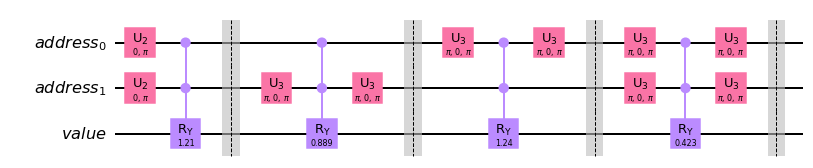

In [5]:
q_address = QuantumRegister(math.floor(math.log2(list_size)), 'address')
q_value = QuantumRegister(1, 'value')

ffqram = QuantumCircuit(q_address, q_value)

for i in range(len(q_address)):
    ffqram.append(HGate(), [q_address[i]])

for index, value in enumerate(data):
    move_to_address(ffqram, index, q_address)
    store_value(ffqram, q_address, q_value, value)
    move_to_address(ffqram, index, q_address)
    ffqram.barrier()
    
ffqram.decompose().draw('mpl')